# **Comparing Images**

####**In this lesson we'll learn:**
1. Compare Images using Mean Squared Error (MSE)
2. UCompare Images using Structual Similarity

### **Great Blogs:**
- https://medium.com/@developerRegmi/image-comparison-using-opencv-spotting-the-differences-e70b05839aa4 (absdiff)
- https://docs.opencv.org/4.x/d8/dc8/tutorial_histogram_comparison.html (Theory+example)
- https://pyimagesearch.com/2020/11/30/siamese-networks-with-keras-tensorflow-and-deep-learning/ (Siamese Network)
- https://medium.com/analytics-vidhya/human-pose-comparison-and-action-scoring-using-deep-learning-opencv-python-c2bdf0ddecba (Pose comparison)
- https://pysource.com/2018/07/20/find-similarities-between-two-images-with-opencv-and-python/ (Features detection & Matching)
- https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/ (3 ways to compare)

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

!unzip -qq images.zip

--2023-05-09 04:54:25--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.62
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  18.4MB/s    in 1.5s    

2023-05-09 04:54:27 (18.4 MB/s) - ‘images.zip’ saved [29586716/29586716]



#### **Mean Squared Error (MSE)**

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [2]:
def mse(image1, image2):
	# Images must be of the same dimension
	error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
	error /= float(image1.shape[0] * image1.shape[1])

	return error

#### **Let's get 3 images**

1. Fireworks1
2. Fireworks1 with brightness enhanced
3. Fireworks2

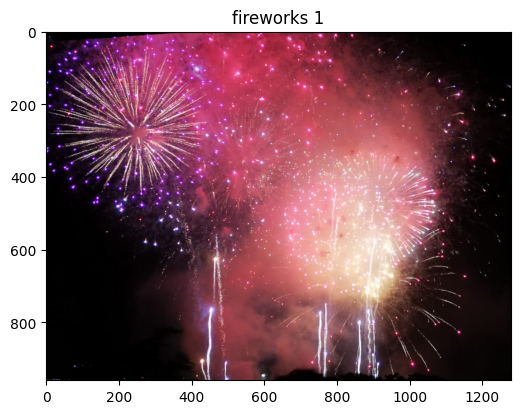

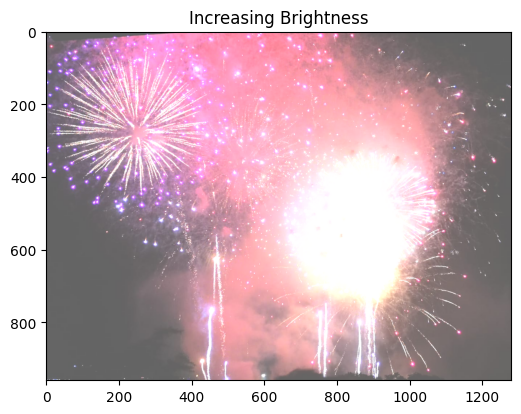

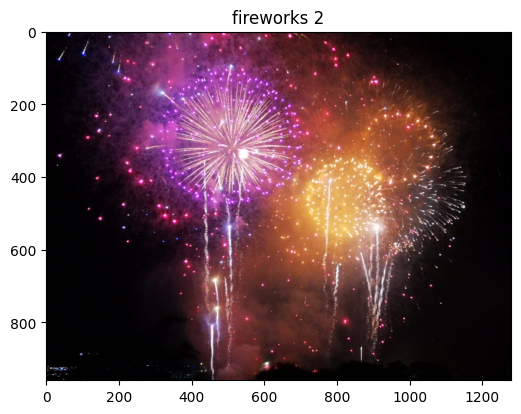

In [3]:
fireworks1 = cv2.imread('images/fireworks.jpeg')
fireworks2 = cv2.imread('images/fireworks2.jpeg')

M = np.ones(fireworks1.shape, dtype = "uint8") * 100 
fireworks1b = cv2.add(fireworks1, M)

imshow("fireworks 1", fireworks1)
imshow("Increasing Brightness", fireworks1b)
imshow("fireworks 2", fireworks2)

In [4]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

In [5]:
# When they're the same
compare(fireworks1, fireworks1)

MSE = 0.00
SS = 1.00


In [6]:
compare(fireworks1, fireworks2)

MSE = 2125.41
SS = 0.48


In [7]:
compare(fireworks1, fireworks1b)

MSE = 8809.38
SS = 0.52


In [8]:
compare(fireworks2, fireworks1b)

MSE = 13418.54
SS = 0.19


### **Comparison using norm function**
- Useful when both images have same shape and orientation.
- If the two images that we want to compare have the same size and orientation, we can use the norm() function of OpenCV. This function finds errors present in identical pixels of the two images.

- We have to find the L2 error, a.k.a, the squared error sum’s square root, and divide it with the total number of pixels present in the image to find the similarity between them.

- We get the total number of pixels by multiplying the number of rows by the number of columns present in one of the given images.
- The normalize() function’s first argument is the source image that we want to normalize.

- The second argument is the destination image, creating an output image with our desired dimensions or size. The third argument is the lower value of range in which we want to normalize an image.

- The fourth argument is the upper value of the range in which we want to normalize an image. The fifth argument is the type of normalization like cv2.NORM_INF, cv2.NORM_L1, and cv2.NORM_MINMAX.

- Every normalization type uses its formula to calculate the normalization. The sixth argument is used to set the data type of the output image.

- The seventh argument is used to create a mask, and it is useful when we don’t want to normalize the whole image. Instead, we only want to normalize a portion of the image.

- We can define that portion in the mask so that normalization will only be performed on the masked portion.

Similarity =  1.0


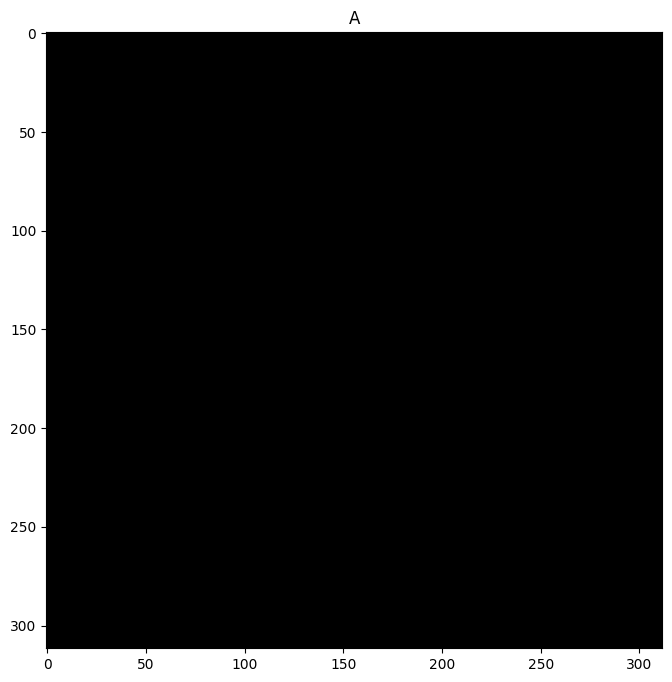

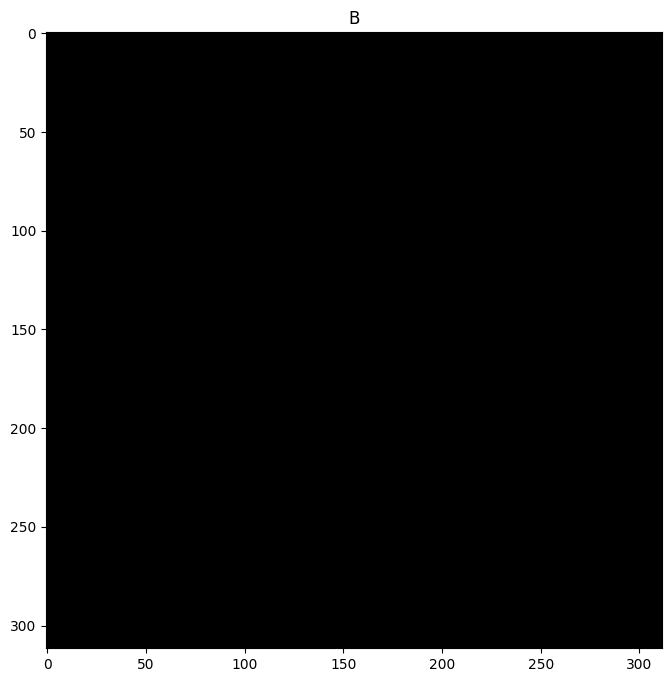

In [9]:
import cv2
import numpy as np

height = 312
width = 312
A = np.zeros((height,width,3), np.uint8)

B = np.zeros((height,width,3), np.uint8)

errorL2 = cv2.norm( A, B, cv2.NORM_L2 )
similarity = 1 - errorL2 / ( height * width )
print('Similarity = ',similarity)

imshow('A',A)
imshow('B',B)

### **Comparison using Histograms**
- We can find the similarity between two images using the compareHist() function of OpenCV. The compareHist() function compares the histogram of two images according to their colors.

- This method compares images only based on their color, so it is useful in places where we dont care about the shape of the objects or their orientation.

- For example, a tree and a forest will have 100 percent similarity because both images have many green colors.

- To compare two images using the compareHist() function, we must convert the images to HSV using the cvt.Color() function of OpenCV and then find the histogram of the images using the calcHist() function.

- After that, we can use the normalize() function to normalize the histograms for comparison. Then, we must pass the normalized histogram of both images inside the compareHist() function along with the comparison method.

- In the code above, the first argument of the calcHist() function is the image in the HSV color space. The second argument is the channels of the given image that we want to use to find the histogram.

- The third argument is used to pass a mask, and it is useful if we want to find the histogram of a portion of the image rather than the entire image. The fourth argument is the histogram’s size, which contains the height and size of the histogram bins.

- The fifth argument is the range of hue and saturation from the HSV color space.

- We used the correlation method in the compareHist() function, but there are also other methods that we can use to compare histograms.

base_base Similarity =  1.0
base_test Similarity =  0.5331198658213834


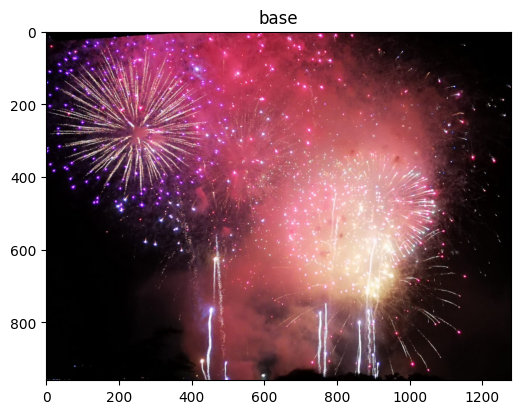

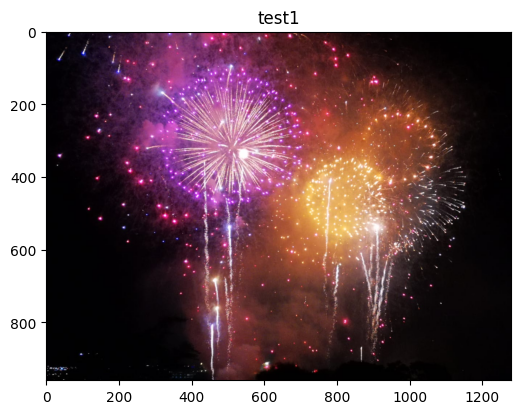

In [12]:
fireworks1 = cv2.imread('images/fireworks.jpeg')
fireworks2 = cv2.imread('images/fireworks2.jpeg')

hsv_base = cv2.cvtColor(fireworks1, cv2.COLOR_BGR2HSV)
hsv_test = cv2.cvtColor(fireworks2, cv2.COLOR_BGR2HSV)

h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges
channels = [0, 1]

hist_base = cv2.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test = cv2.calcHist([hsv_test], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_test, hist_test, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)


compare_method = cv2.HISTCMP_CORREL

base_base = cv2.compareHist(hist_base, hist_base, compare_method)
base_test = cv2.compareHist(hist_base, hist_test, compare_method)

print('base_base Similarity = ', base_base)
print('base_test Similarity = ', base_test)
#print('base_test2 Similarity = ', base_test2)

imshow('base',fireworks1)
imshow('test1',fireworks2)
#cv.imshow('test2',test2)